# Red Neuronal Profunda (DNN) para clasificación MNIST

Aplicaremos todos nuestros conocimientos para crear una DNN, frecuentemente llamada también una Artificial Neural Network (ANN).  El problema que vamos a trabajar se conoce como el "Hola Mundo" del aprendizaje profundo porque para la mayoría de estudiantes este es el primer algoritmo de aprendizaje profundo que ven. 

El conjunto de datos se llama MNIST y se refiere al reconocimiento de dígitos escritos a mano.  Pueden encontrar más información en el sitio web de Yann LeCun (Director of AI Research, Facebook).  El es uno de los pioneros de todo este tema, así como de otras metodologías más complejas como las Redes Neurales Convolucionales (CNN) que se utilizan hoy día.

El conjunto de datos tiene 70,000 imágenes (28x28 pixels) de dígitos escritos a mano (1 dígito por imagen).

La meta es escribir un algoritmo que detecta qué dígito ha sido escrito.  Como solo hay 10 dígitos (0 al 9), este es un problema de clasificación con 10 clases.

Nuestra meta será construir una RN con 2 capas escondidas.

## Plan de Acción para preparar el modelo

1.  Preparar los datos y preprocesarlos.  Crear los conjuntos de datos para entrenar, validar y probar
2.  Crear un esboso del modelo y seleccionar las funciones de activación
3.  Fijar los optimizadores avanzados y la función de pérdida
4.  Hacer que el modelo aprenda
5.  Probar la exactitud ("accuracy") del modelo

## Importar los paquetes relevantes

TensorFlow incluye un proveedor de los datos de MNIST que utilizaremos acá.  Viene con el módulo **"tensorflow.keras.datasets"**. 

In [1]:
import numpy as np
import tensorflow as tf

c:\Users\15-4JO\Desktop\coding_Code\data-science\Lab2-Data_Science\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\15-4JO\Desktop\coding_Code\data-science\Lab2-Data_Science\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\15-4JO\Desktop\coding_Code\data-science\Lab2-Data_Science\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than th

La siguiente instrucción, cuando se corre por primera vez, descarga el conjunto de datos en lo indicado por el parámetro path, relativo a  ~/.keras/datasets).  Como si se hubiera ejecutado Lo siguiente:

tf.keras.datasets.mnist.load_data(
    path = 'mnist.npz'
)

luego separa los datos en un conjunto para entrenamiento y otro para pruebas.

Si se ejecuta más de una vez, ya no descarga el archivo.

In [2]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()


In [3]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Como no podemos ver la forma de los conjuntos...les queda de tarea averiguar por qué no...podemos utilizar la instrucción **assert**

In [4]:
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

## Datos

Esta sección es donde pre-procesaremos nuestros datos.

Por default, TF2 tiene conjuntos de datos de entrenamiento y de prueba, pero no tiene un conjunto de validación, por lo que debemos dividirlo por nuestra cuenta

Lo haremos del mismo tamaño que el conjunto de prueba

In [5]:
num_obs_validacion = y_prueba.shape[0]

Usaremos una variable dedicada para el número de observaciones de prueba

In [6]:
num_obs_prueba = y_prueba.shape[0]

Generalmente preferimos "normalizar" nuestros datos en alguna forma para que el resultado sea numéricamente más estable.  En este caso simplemente preferimos tener entradas entre 0 y 1, por lo que definimos una función, que reciba la imagen MNIST.

Como los posibles valores de las entradas son entre 0 y 255 (256 posibles tonos de gris), al dividirlos por 255 obtenemos el resultado deseado.

In [7]:
X_entreno_normalizado = X_entreno / 255

Finalmente, normalizaremos y convertiremos los datos de pruebas en tandas.  Los normalizamos para que tengan la misma magnitud que los datos de entrenamiento y validación.

No hay necesidad de "barajearlo" ya que no estaremos entrenando con los datos de prueba.  Habra una sola tanda, igual al tamaño de los datos de prueba.

In [8]:
X_prueba_normalizado = X_prueba / 255

Una vez se han "normalizado" los datos, podemos proceder a extraer los datos de entrenamiento y de validación.

Nuestros datos de validación serán 10000 para ser igual al conjunto de prueba.

Finalmente, creamos una tanda con un tamaño de tanda igual al total de muestras de validación.

In [9]:
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]

Similarmente, los datos de entrenamiento son todos los demás por lo que nos salteamos tantas observaciones como las hay en el conjunto de validación.

In [10]:
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

Convertir de Arreglos Numpy a Tensores

In [11]:
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

Barajear y hacer tandas con el conjunto de datos de entrenamiento

In [12]:
TAMANIO_TANDA = 64
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

Hacer tandas con los conjuntos de validación y prueba, no se necesita barajearlos

In [13]:
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

## Modelo

### Delineamos el modelo

Cuando pensamos sobre un algoritmo de aprendizaje profundo, casi siempre imaginamos la realización del mismo.  Asi que esta vez, hagámoslo.  :)

In [14]:
tamanio_entrada = 784
tamanio_salida = 10

Usaremos el mismo ancho para ambas capas escondidas.  (No es una necesidad!)

In [15]:
tamanio_capa_escondida = 520
tamanio_capa_escondida_2 = 300
tamanio_capa_escondida_3 = 250
tamanio_capa_escondida_4 = 130
tamanio_capa_escondida_5 = 60


# Definimos cómo se verá el modelo

Observamos que hay 5 capas escondidas donde 1 es relu, tanh y 3 sigmoide en las cuales todas van a utilizar técnicas de regularización porque puede ayudar a que el modelo generalice mejor y no dependa de pesos extremos, promoviendo soluciones más estables y confiables en nuevos datos.


In [16]:

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    
    tf.keras.layers.Dense(tamanio_capa_escondida_2, activation='tanh',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    
    tf.keras.layers.Dense(tamanio_capa_escondida_3, activation='sigmoid',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    
    tf.keras.layers.Dense(tamanio_capa_escondida_4, activation='sigmoid',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    
    tf.keras.layers.Dense(tamanio_capa_escondida_5, activation='sigmoid',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    
    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])


c:\Users\15-4JO\Desktop\coding_Code\data-science\Lab2-Data_Science\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Seleccionar el optimizador y la función de pérdida

Definimos el optimizador que nos gustaría utilizar, la función de pérdida, y las métricas que nos interesa obtener en cada interacción

In [17]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Acá es donde entrenamos el modelo que hemos construído

Determinamos el número máximo de épocas.

Ajustamos el modelo , especificando:

* los datos de entrenamiento
* el número total de épocas
* y los datos de validación que creamos en el formato (entradas, metas)

Epoch 1/5
782/782 - 32s - 42ms/step - accuracy: 0.8020 - loss: 1.1065 - val_accuracy: 0.9354 - val_loss: 0.6225
Epoch 2/5
782/782 - 20s - 25ms/step - accuracy: 0.9397 - loss: 0.5628 - val_accuracy: 0.9549 - val_loss: 0.4809
Epoch 3/5
782/782 - 18s - 23ms/step - accuracy: 0.9530 - loss: 0.4741 - val_accuracy: 0.9535 - val_loss: 0.4534
Epoch 4/5
782/782 - 21s - 27ms/step - accuracy: 0.9559 - loss: 0.4344 - val_accuracy: 0.9515 - val_loss: 0.4412
Epoch 5/5
782/782 - 19s - 24ms/step - accuracy: 0.9579 - loss: 0.4114 - val_accuracy: 0.9609 - val_loss: 0.3927


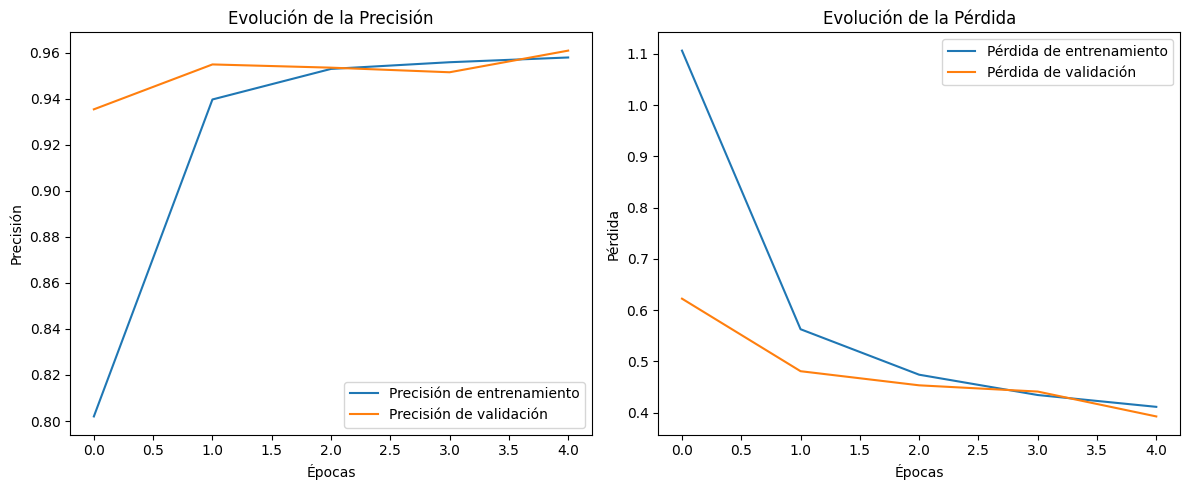

In [18]:
NUMERO_EPOCAS = 5


historial = modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

import matplotlib.pyplot as plt

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de validación')
plt.title('Evolución de la Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


## Probar el modelo

El modelo ha aprendido de forma rápida y efectiva, alcanzando una alta precisión y una baja pérdida tanto en los datos de entrenamiento como en los de validación. Las curvas convergen y se aplanan al final del entrenamiento, lo que indica que el modelo está bien ajustado y no presenta un sobreajuste significativo.

In [19]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9507 - loss: 0.5422


In [20]:
# Si se desea, se puede aplicar un formateo "bonito"
print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Pérdida de prueba: 0.54. Precisión de prueba: 95.07%
